In [1]:
# The numerical integrators are located in a module two levels above
# the current working directory. Hence:
import sys
sys.path.insert(0, '../..')

In [2]:
from numerical_integrators.singlestep import euler, rk2, rk3, rk4
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Enkelt testproblem: Integrer opp $\frac{d}{dt}\arctan{t}$ fra 0 til 1 for å estimere $\frac{\pi}{4}$

In [3]:
def deriv(t,x):
    return 1/(1+t**2)

def endpoint(t_min,t_max,stride, x0,integrator,deriv):
    t = np.copy(t_min)
    x = np.copy(x0)
    h = np.copy(stride)
    while t < t_max:
        h = np.minimum(h, t_max-t)
        t,x,h = integrator(t,x,h,deriv)
    return x

# Definerer start- og sluttpunkt og utfører integrasjon

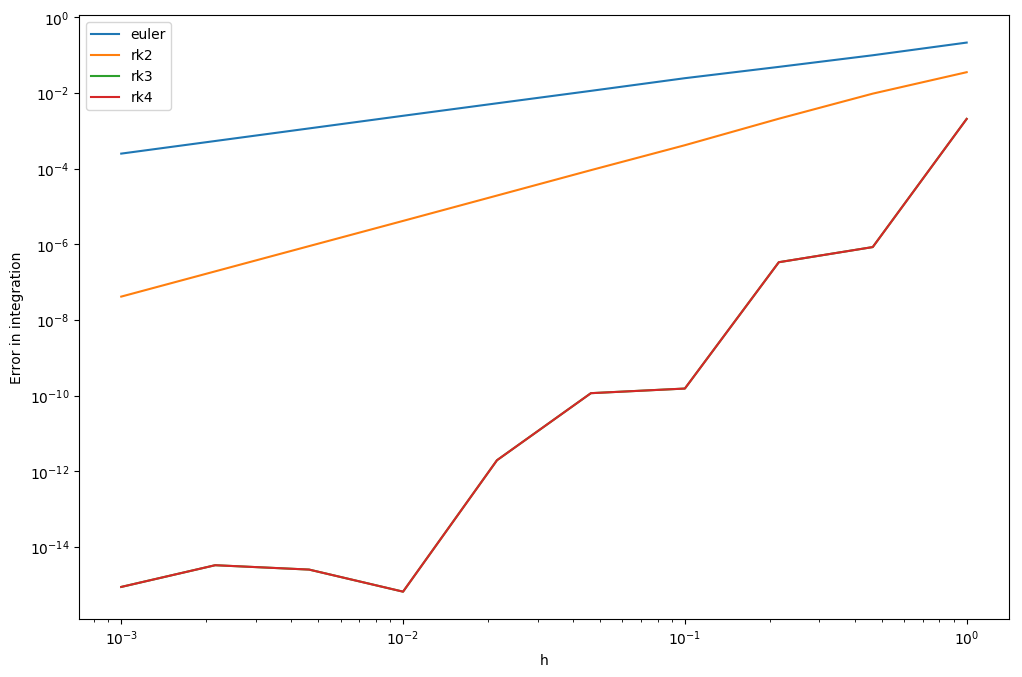

In [4]:
t_min=0
t_max=1
x0=0
hs=np.logspace(-3,0,10)

integrators = [euler, rk2, rk3, rk4]
integrator_labels = [integrator.__name__ for integrator in integrators]
integrator_errors = np.empty((len(integrators),np.size(hs)))

plt.figure(figsize=(12,8),dpi=100)

for j, integrator in enumerate(integrators):
    for i, h in enumerate(hs):
        integrator_errors[j,i] = np.abs(np.pi/4 - endpoint(t_min,t_max,h,x0,integrator,deriv))
    plt.loglog(hs,integrator_errors[j],label=integrator_labels[j])

plt.legend()
plt.xlabel(r'h')
plt.ylabel('Error in integration')

# Sjekker om feilen i RK3 og RK4 er identisk

In [5]:
assert np.all(np.equal(integrator_errors[2],integrator_errors[3]) )

# Sjekker om integratorene faktisk er ulike

In [6]:
assert id(rk3) is not id(rk4)

In [7]:
print(rk3.__doc__)

    This function performs a single time step forwards, using the
    Kutta (RK3) scheme, finding an approximation of the coordinates at
    the new time level.

    The Kutta scheme is a member of the Runge-Kutta family of ODE
    solvers, and is third-order accurate.

    Input:
       t:        Current time level
       x:        Current coordinates, array-like
       h:        Time increment (fixed)
       f:        Function handle for the derivatives (the RHS of the ODE
                      system), function signature: f = f(t, x)
       **kwargs: Keyword arguments for the derivatives (optional)

    Output:
       _t:        New time level
       _x:        Kutta approximation of the coordinates at the
                     new time level
       _h:        Time increment (unaltered, yet returned, in order for
                      the return variable signatures of the numerical
                      integrators to remain consistent across single-,
                      multi- and

In [8]:
print(rk4.__doc__)

    This function performs a single time step forwards, using the
    classical Runge-Kutta (RK4) scheme, finding an approximation of the
    coordinates at the new time level.

    The classical Runge-Kutta scheme is a member of the Runge-Kutta
    family of ODE solvers, and is fourth-order accurate.

    Input:
       t:        Current time level
       x:        Current coordinates, array-like
       h:        Time increment (fixed)
       f:        Function handle for the derivatives (the RHS of the ODE
                     system), function signature: f = f(t, x)
       **kwargs: Keyword arguments for the derivatives (optional)

    Output:
       _t:       New time level
       _x:       Runge-Kutta approximation of the coordinates at the
                     new time level
       _h:       Time increment (unaltered, yet returned, in order for
                      the return variable signatures of the numerical
                      integrators to remain consistent across single

In [9]:
assert rk3 is not rk4

# $\rightarrow$ ?